In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
from glob import glob
from typing import Dict, List
import os
import glob
import subprocess
import pytorch_hpc

In [2]:
me = subprocess.run(["whoami"], capture_output=True).stdout.decode('utf').strip()

In [5]:
def extract_scalar_data(fname: str, report_info=True) -> Dict[str,List]:
    """Returns a dictionary of str:List pairs that correspond to 
    scalar tags and their list of ScalarEvents
    
    Parameters
    ----------
    fname:
        Full path to the desired tensorboard events.out file
        
    Returns
    -------
    data_dict:
        Dictionary of tag:List[Scalar.Event]
    """
    events = EventAccumulator(fname)
    events.Reload()
    scalar_tags = events.Tags()['scalars']
    data_dict = {}
    for tag in scalar_tags:
        data_dict[tag] = events.Scalars(tag)

    if report_info:
        wts = [i.wall_time for i in data_dict["epoch"]] 
        avg = np.average(np.diff(wts))
        std = np.std(np.diff(wts))
        total = wts[-1] - wts[1]
        print(f"Summary for {fname}:")
        print("====================")
        print(f"Total training time: {total:.4f} (s)")
        print(f"Average training time: {avg:.4f} +/- {std:.2f} (s)")
        print("\n")
        
    return data_dict

def get_last_logfile(directory: str) -> str:
    """Grabs the last tensorboard eventfile in the specified directory"""

    files = list(glob.glob(directory + "/events*"))
    if len(files) == 0:
        print(f"No event files found in {directory}")
        return None
        
    files = [f for f in files if os.path.isfile(os.path.join(directory, f))]

    files_sorted = sorted(files, key=lambda f: os.path.getmtime(os.path.join(directory, f)))
    return files_sorted[-1]

In [11]:
work = f"/home/woody/k_t70h/{me}"

cpu_logfile = get_last_logfile(f"{work}/NHR-AI-2025/pytorch_tests/fashion_mnist_cpu/tensorboard")
gpu_logfile = get_last_logfile(f"{work}/NHR-AI-2025/pytorch_tests/fashion_mnist_gpu/tensorboard")
gpu_2_logfile = get_last_logfile(f"{work}/NHR-AI-2025/pytorch_tests/fashion_mnist_2_gpu/tensorboard")
conv_logfile = get_last_logfile(f"{work}/fashion_mnist_conv_gpu/tensorboard")
cpu_data = extract_scalar_data(cpu_logfile)
gpu_data = extract_scalar_data(gpu_logfile)
gpu_2_data = extract_scalar_data(gpu_2_logfile)
conv_data = extract_scalar_data(conv_logfile)

Summary for /home/woody/k_t70h/t70h0005/NHR-AI-2025/pytorch_tests/fashion_mnist_cpu/tensorboard/events.out.tfevents.1747853870.a1621.nhr.fau.de.230382.0:
Total training time: 224.6603 (s)
Average training time: 7.7785 +/- 7.16 (s)


Summary for /home/woody/k_t70h/t70h0005/NHR-AI-2025/pytorch_tests/fashion_mnist_gpu/tensorboard/events.out.tfevents.1747853871.a1621.nhr.fau.de.230534.0:
Total training time: 83.3483 (s)
Average training time: 1.0641 +/- 0.31 (s)


Summary for /home/woody/k_t70h/t70h0005/NHR-AI-2025/pytorch_tests/fashion_mnist_2_gpu/tensorboard/events.out.tfevents.1747854320.a1621.nhr.fau.de.240487.0:
Total training time: 60.2347 (s)
Average training time: 0.7719 +/- 0.02 (s)


Summary for /home/woody/k_t70h/t70h0005/fashion_mnist_conv_gpu/tensorboard/events.out.tfevents.1747855010.a1621.nhr.fau.de.253912.0:
Total training time: 28.6279 (s)
Average training time: 0.7386 +/- 0.56 (s)




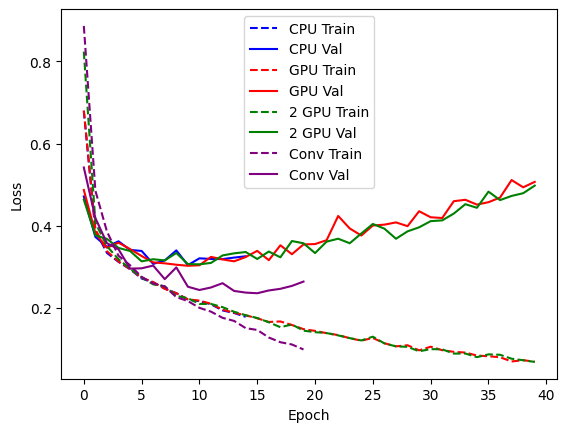

In [12]:
datas = [cpu_data, gpu_data]
colors = ["blue","red"]
labels = ['CPU','GPU']

for data_dict, color, label in zip(datas, colors, labels):
    vals = [ev.value for ev in data_dict['validation_loss']]
    trains  = [ev.value for ev in data_dict['training_loss']]
    plt.plot(trains, label=f"{label} Train", color=color, linestyle='--')
    plt.plot(vals, label=f"{label} Val", color=color)

plt.ylabel(r"Loss")
plt.xlabel("Epoch")
plt.legend(loc='best')
plt.show()

In [8]:
help(pytorch_hpc.nn.models.ConvolutionClassifier)

AttributeError: module 'pytorch_hpc.nn.models' has no attribute 'ConvolutionalClassifier'